In [1]:
import cairo
import cv2
from math import pi
import random
import math
from PIL import Image
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 

In [2]:
def polar_to_cart(theta, dist):
    
    x = 1 + dist * math.cos(theta)
    y = 1 + dist * math.sin(theta)
    
    return x,y

t = math.pi/180.0

def remap(old_val, old_min, old_max, new_min, new_max):
    return (new_max - new_min)*(old_val - old_min) / (old_max - old_min) + new_min

def draw(geno):
    
    
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 100, 100)
    ctx = cairo.Context(surface)

    ctx.scale(50, 50)
    # Paint the background
    ctx.set_source_rgb(0, 0 , 0)
    ctx.paint()

    r1 = remap(geno[8], 0, 1,0.1, 1)
    r2 = remap(geno[9], 0, 1,0.1, 1)
    r3 = remap(geno[10], 0, 1,0.1, 1)
    r4 = remap(geno[11], 0, 1,0.1, 1)
    r5 = remap(geno[12], 0, 1,0.1, 1)
    r6 = remap(geno[13], 0, 1,0.1, 1)
    r7 = remap(geno[14], 0, 1,0.1, 1)
    r8 = remap(geno[15], 0, 1,0.1, 1)

    # Draw the image
    firstx, firsty = polar_to_cart((0 + geno[0])*45*t, r1)
    secondx, secondy = polar_to_cart((1 + geno[1])*45*t, r2)
    thirdx, thirdy = polar_to_cart((2 + geno[2])*45*t, r3)
    forthx, forthy = polar_to_cart((3 + geno[3])*45*t, r4)
    fifthx, fifthy = polar_to_cart((4 + geno[4])*45*t, r5)
    sixthx, sixthy = polar_to_cart((5 + geno[5])*45*t, r6)
    seventhx, seventhy = polar_to_cart((6 + geno[6])*45*t, r7)
    eigthx, eigthy = polar_to_cart((7 + geno[7])*45*t, r8)
    ctx.move_to(firstx, firsty)

    ctx.line_to(secondx, secondy)
    ctx.line_to(thirdx, thirdy)
    ctx.line_to(forthx, forthy)
    ctx.line_to(fifthx, fifthy)
    ctx.line_to(sixthx, sixthy)
    ctx.line_to(seventhx, seventhy)
    ctx.line_to(eigthx, eigthy)
    
    ctx.close_path()
    ctx.set_source_rgb(1, 1, 1)
    ctx.fill_preserve()
    

    return surface

MaxDist3 max : 0.4333
Standard max : 0.5282


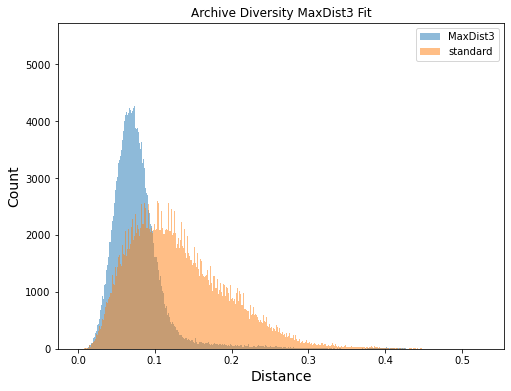

In [3]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points


diversity_myversion3 = []

centroids_myversion3 = load_centroids("centroids_myversion3.dat")
data_myversion3 = np.loadtxt("archive_myversion3.dat")
fit_myversion3 = data_myversion3[:,0:1]
cent_myversion3 = data_myversion3[:, 1:3]
desc_myversion3 = data_myversion3[:, 3: 5]
geno_myversion3 = data_myversion3[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_myversion3.shape[0]):    
    img1 = draw(geno_myversion3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_myversion3.shape[0]):
        img2 = draw(geno_myversion3[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_myversion3.append(dist)

diversity_myversion7 = []

centroids_myversion7 = load_centroids("centroids_myversion7.dat")
data_myversion7 = np.loadtxt("archive_myversion7.dat")
fit_myversion7 = data_myversion7[:,0:1]
cent_myversion7 = data_myversion7[:, 1:3]
desc_myversion7 = data_myversion7[:, 3: 5]
geno_myversion7 = data_myversion7[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_myversion7.shape[0]):    
    img1 = draw(geno_myversion7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_myversion7.shape[0]):
        img2 = draw(geno_myversion7[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_myversion7.append(dist)
        
diversity_standard = []

centroids_standard = load_centroids("centroids_standard.dat")
data_standard = np.loadtxt("archive_standard.dat")
fit_standard = data_standard[:,0:1]
cent_standard = data_standard[:, 1:3]
desc_standard = data_standard[:, 3: 5]
geno_standard = data_standard[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_standard.shape[0]):    
    img1 = draw(geno_standard[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_standard.shape[0]):
        img2 = draw(geno_standard[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_standard.append(dist)

    
#Histogram

plt.figure(figsize=(8,6))
plt.hist(diversity_myversion3, bins=1000, alpha=0.5, label="MaxDist3")
plt.hist(diversity_standard, bins=1000, alpha=0.5, label="standard")
plt.xlabel("Distance", size=14)
plt.ylabel("Count", size=14)
plt.title("Archive Diversity MaxDist3 Fit")
plt.legend(loc='upper right')
plt.savefig("Archive Diversity MaxDist3 Fit.png")
print("MaxDist3 max : {}".format(max(diversity_myversion3)))
print("Standard max : {}".format(max(diversity_standard)))

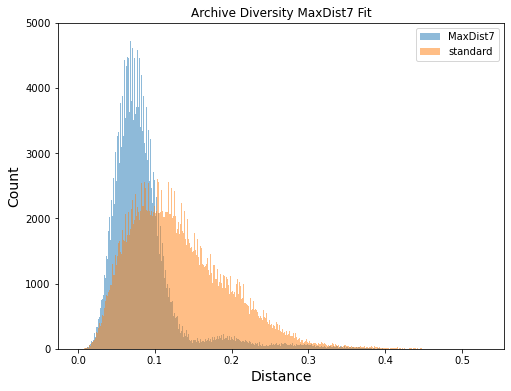

In [16]:
#Histogram

plt.figure(figsize=(8,6))
plt.hist(diversity_myversion7, bins=1000, alpha=0.5, label="MaxDist7")
plt.hist(diversity_standard, bins=1000, alpha=0.5, label="standard")
plt.xlabel("Distance", size=14)
plt.ylabel("Count", size=14)
plt.title("Archive Diversity MaxDist7 Fit")
plt.legend(loc='upper right')
plt.savefig("Archive Diversity MaxDist7 Fit.png")


MaxDist7 max : -0.039591796819704386
Standard max : [-0.05466455]
MaxDist7 mean : -0.1761403148195191
Standard mean : -0.18767019341161104


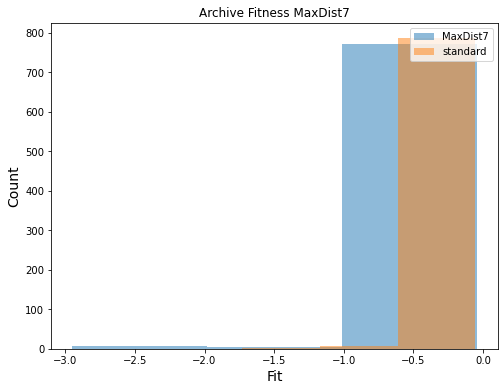

In [4]:
def real_fit(geno):
    r1 = remap(geno[8], 0, 1,0.1, 1)
    r2 = remap(geno[9], 0, 1,0.1, 1)
    r3 = remap(geno[10], 0, 1,0.1, 1)
    r4 = remap(geno[11], 0, 1,0.1, 1)
    r5 = remap(geno[12], 0, 1,0.1, 1)
    r6 = remap(geno[13], 0, 1,0.1, 1)
    r7 = remap(geno[14], 0, 1,0.1, 1)
    r8 = remap(geno[15], 0, 1,0.1, 1)

    x = abs(r1*math.cos(geno[0]*45*t) - r5*math.cos(geno[4]*45*t)) + abs(r2*math.cos(geno[1]*45*t) - r6*math.cos(geno[5]*45*t)) + abs(r3*math.cos(geno[2]*45*t) - r7*math.cos(geno[6]*45*t)) + abs(r4*math.cos(geno[3]*45*t) - r8*math.cos(geno[7]*45*t))
    y = abs(r1*math.sin(geno[0]*45*t) - r5*math.sin(geno[4]*45*t)) + abs(r2*math.sin(geno[1]*45*t) - r6*math.sin(geno[5]*45*t)) + abs(r3*math.sin(geno[2]*45*t) - r7*math.sin(geno[6]*45*t)) + abs(r4*math.sin(geno[3]*45*t) - r8*math.sin(geno[7]*45*t))

    simmetry = - (x+y)
    return simmetry

real_fit_list = []
for j in range(0, len(fit_myversion7)):
    real_fit_list.append(real_fit(geno_myversion7[j]))
    
#Histogram fitness

plt.figure(figsize=(8,6))
plt.hist(real_fit_list, bins=3, alpha=0.5, label="MaxDist7")
plt.hist(fit_standard, bins=3, alpha=0.5, label="standard")
plt.xlabel("Fit", size=14)
plt.ylabel("Count", size=14)
plt.title("Archive Fitness MaxDist7")
plt.legend(loc='upper right')
plt.savefig("Archive Fitness MaxDist7.png")
print("MaxDist7 max : {}".format(max(real_fit_list)))
print("Standard max : {}".format(max(fit_standard)))
print("MaxDist7 mean : {}".format(np.mean(real_fit_list)))
print("Standard mean : {}".format(np.mean(fit_standard)))